In [1]:
gse_id='GSE40279'
url='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE40nnn/GSE40279/suppl/GSE40279_average_beta.txt.gz'
!wget {url} -O matrix.gz

--2020-06-10 15:55:10--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE40nnn/GSE40279/suppl/GSE40279_average_beta.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 2607:f220:41e:250::11
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1223258643 (1.1G) [application/x-gzip]
Saving to: ‘matrix.gz’

matrix.gz           100%[===================>]   1.14G  63.4MB/s    in 16s     

2020-06-10 15:55:26 (72.3 MB/s) - ‘matrix.gz’ saved [1223258643/1223258643]



In [16]:
import pandas as pd
df=pd.read_table('matrix.gz',index_col=0)
df.shape

(473034, 656)

In [17]:
df=df.transpose()
df.index=[c.split('.')[0] for c in df.index]
df.index.name = "title"
df

ID_REF,cg13869341,cg14008030,cg12045430,cg20826792,cg00381604,cg20253340,cg21870274,cg03130891,cg24335620,cg16162899,...,cg27124406,cg19565306,cg22012975,cg10353737,cg22531257,cg22662321,cg06996138,cg16817496,cg07660283,cg09226288
title,,,,,,,,,,,,,,,,,,,,,
X1001,0.849261,0.505916,0.072590,0.186961,0.036803,0.661391,0.777891,0.119538,0.782193,0.905126,...,0.079514,0.003605,0.016267,0.058144,0.016545,0.044135,0.021236,0.291702,0.727581,0.705499
X1002,0.897434,0.476842,0.079020,0.228201,0.053161,0.545065,0.776407,0.063938,0.787890,0.913628,...,0.080328,0.004043,0.008628,0.044876,0.014927,0.058587,0.019314,0.232008,0.693993,0.716328
X1003,0.751596,0.487245,0.089230,0.237660,0.045588,0.560305,0.774234,0.113279,0.788896,0.914348,...,0.079417,0.003508,0.004635,0.041357,0.024015,0.058990,0.016854,0.296456,0.703291,0.703523
X1004,0.871313,0.466692,0.076666,0.253624,0.032824,0.509904,0.772503,0.067163,0.800081,0.882308,...,0.080837,0.005296,0.006407,0.041691,0.030413,0.064237,0.019278,0.270818,0.751772,0.696888
X1005,0.775703,0.490255,0.079986,0.220404,0.035804,0.549847,0.730345,0.131637,0.759171,0.902783,...,0.084922,0.016451,0.007065,0.060183,0.015760,0.064953,0.016097,0.236963,0.746697,0.693056


In [4]:
import GEOparse
gse = GEOparse.get_GEO(geo=gse_id, destdir="./")
age_field='characteristics_ch1.0.age (y)'
ages=gse.phenotype_data[['title',age_field]]
ages.index=ages.title
ages=ages.drop('title',1)
ages.index=['X'+age.split('y ')[1] for age in ages.index]
ages.columns=['age']

10-Jun-2020 15:56:50 DEBUG utils - Directory ./ already exists. Skipping.
10-Jun-2020 15:56:50 INFO GEOparse - File already exist: using local version.
10-Jun-2020 15:56:50 INFO GEOparse - Parsing ./GSE40279_family.soft.gz: 
10-Jun-2020 15:56:50 DEBUG GEOparse - DATABASE: GeoMiame
10-Jun-2020 15:56:50 DEBUG GEOparse - SERIES: GSE40279
10-Jun-2020 15:56:50 DEBUG GEOparse - PLATFORM: GPL13534
/home/mahdi_moqri_gmail_com/miniconda3/envs/foxo/lib/python3.8/site-packages/GEOparse/GEOparse.py:104: DtypeWarning: Columns (11,14,15,36) have mixed types.Specify dtype option on import or set low_memory=False.
  return parse_GSE(filepath)
10-Jun-2020 15:56:58 DEBUG GEOparse - SAMPLE: GSM989827
10-Jun-2020 15:56:59 DEBUG GEOparse - SAMPLE: GSM989828
10-Jun-2020 15:57:00 DEBUG GEOparse - SAMPLE: GSM989829
10-Jun-2020 15:57:01 DEBUG GEOparse - SAMPLE: GSM989830
10-Jun-2020 15:57:02 DEBUG GEOparse - SAMPLE: GSM989831
10-Jun-2020 15:57:03 DEBUG GEOparse - SAMPLE: GSM989832
10-Jun-2020 15:57:04 DEBUG GE

In [30]:
df=df.merge(ages,left_index=True, right_index=True)
df.head()

,cg13869341,cg14008030,cg12045430,cg20826792,cg00381604,cg20253340,cg21870274,cg03130891,cg24335620,cg16162899,...,cg19565306,cg22012975,cg10353737,cg22531257,cg22662321,cg06996138,cg16817496,cg07660283,cg09226288,age
X1001,0.849261,0.505916,0.072590,0.186961,0.036803,0.661391,0.777891,0.119538,0.782193,0.905126,...,0.003605,0.016267,0.058144,0.016545,0.044135,0.021236,0.291702,0.727581,0.705499,67
X1002,0.897434,0.476842,0.079020,0.228201,0.053161,0.545065,0.776407,0.063938,0.787890,0.913628,...,0.004043,0.008628,0.044876,0.014927,0.058587,0.019314,0.232008,0.693993,0.716328,89
X1003,0.751596,0.487245,0.089230,0.237660,0.045588,0.560305,0.774234,0.113279,0.788896,0.914348,...,0.003508,0.004635,0.041357,0.024015,0.058990,0.016854,0.296456,0.703291,0.703523,66
X1004,0.871313,0.466692,0.076666,0.253624,0.032824,0.509904,0.772503,0.067163,0.800081,0.882308,...,0.005296,0.006407,0.041691,0.030413,0.064237,0.019278,0.270818,0.751772,0.696888,64
X1005,0.775703,0.490255,0.079986,0.220404,0.035804,0.549847,0.730345,0.131637,0.759171,0.902783,...,0.016451,0.007065,0.060183,0.015760,0.064953,0.016097,0.236963,0.746697,0.693056,62


In [31]:
import numpy as np
df.age=df.age.replace('-',np.nan)
df=df.dropna(subset=['age'])
df.age=df.age.astype(int)
df.shape

(656, 473035)

In [32]:
cor=df.corrwith(df.age)
cor.sort_values()

cg10501210   -0.726036
cg19283806   -0.678651
cg08234504   -0.668585
cg01974375   -0.648142
cg16054275   -0.645802
                ...   
cg22454769    0.743994
cg24724428    0.744579
cg06639320    0.747103
cg16867657    0.858536
age           1.000000
Length: 473035, dtype: float64

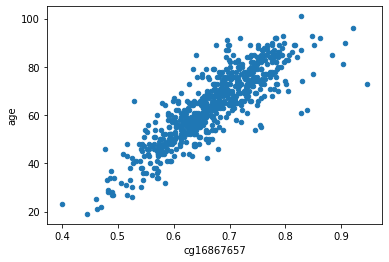

In [33]:
df[['cg16867657','age']].plot.scatter('cg16867657','age')

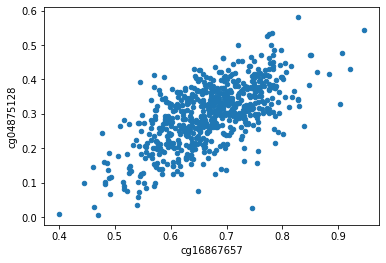

In [34]:
df[['cg16867657','cg04875128']].plot.scatter('cg16867657','cg04875128')

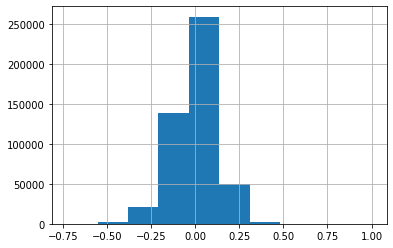

In [35]:
import matplotlib as plt
cor.hist()